# Lab 3: Asking Statistical Questions

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import pandas as pd

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

# Problem 1

We are looking at the temperature reading (meta-data) associated with an experiment. The temperature should be at around 12 Kelvin, and if we look at the data it is mostly consistent with 12 Kelvin to within the 0.4 degree precision of the thermometry and the thermal control system (standard deviation). There are times when the thermal control system misbehaved. While it is possible to have an error in the thermometry such that the true temperature was fine, and we just had a wonky reading, in an abundance of caution we want to throw those values out too.

To make this a bit concrete, we will simulate a little data. Start by simulating 100k 'good' data points assuming Gaussian fluctations, and because we are playing god adding the following 'bad' datapoints: {10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7}

In [2]:
simulated_bad_points = [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7]
simulated_good_points = stats.norm.rvs(loc = 12., scale = 0.4, size = 100000)
d = np.append(simulated_good_points, simulated_bad_points)

## Part A

1) Start by exploring the data you have created with appropriate plots

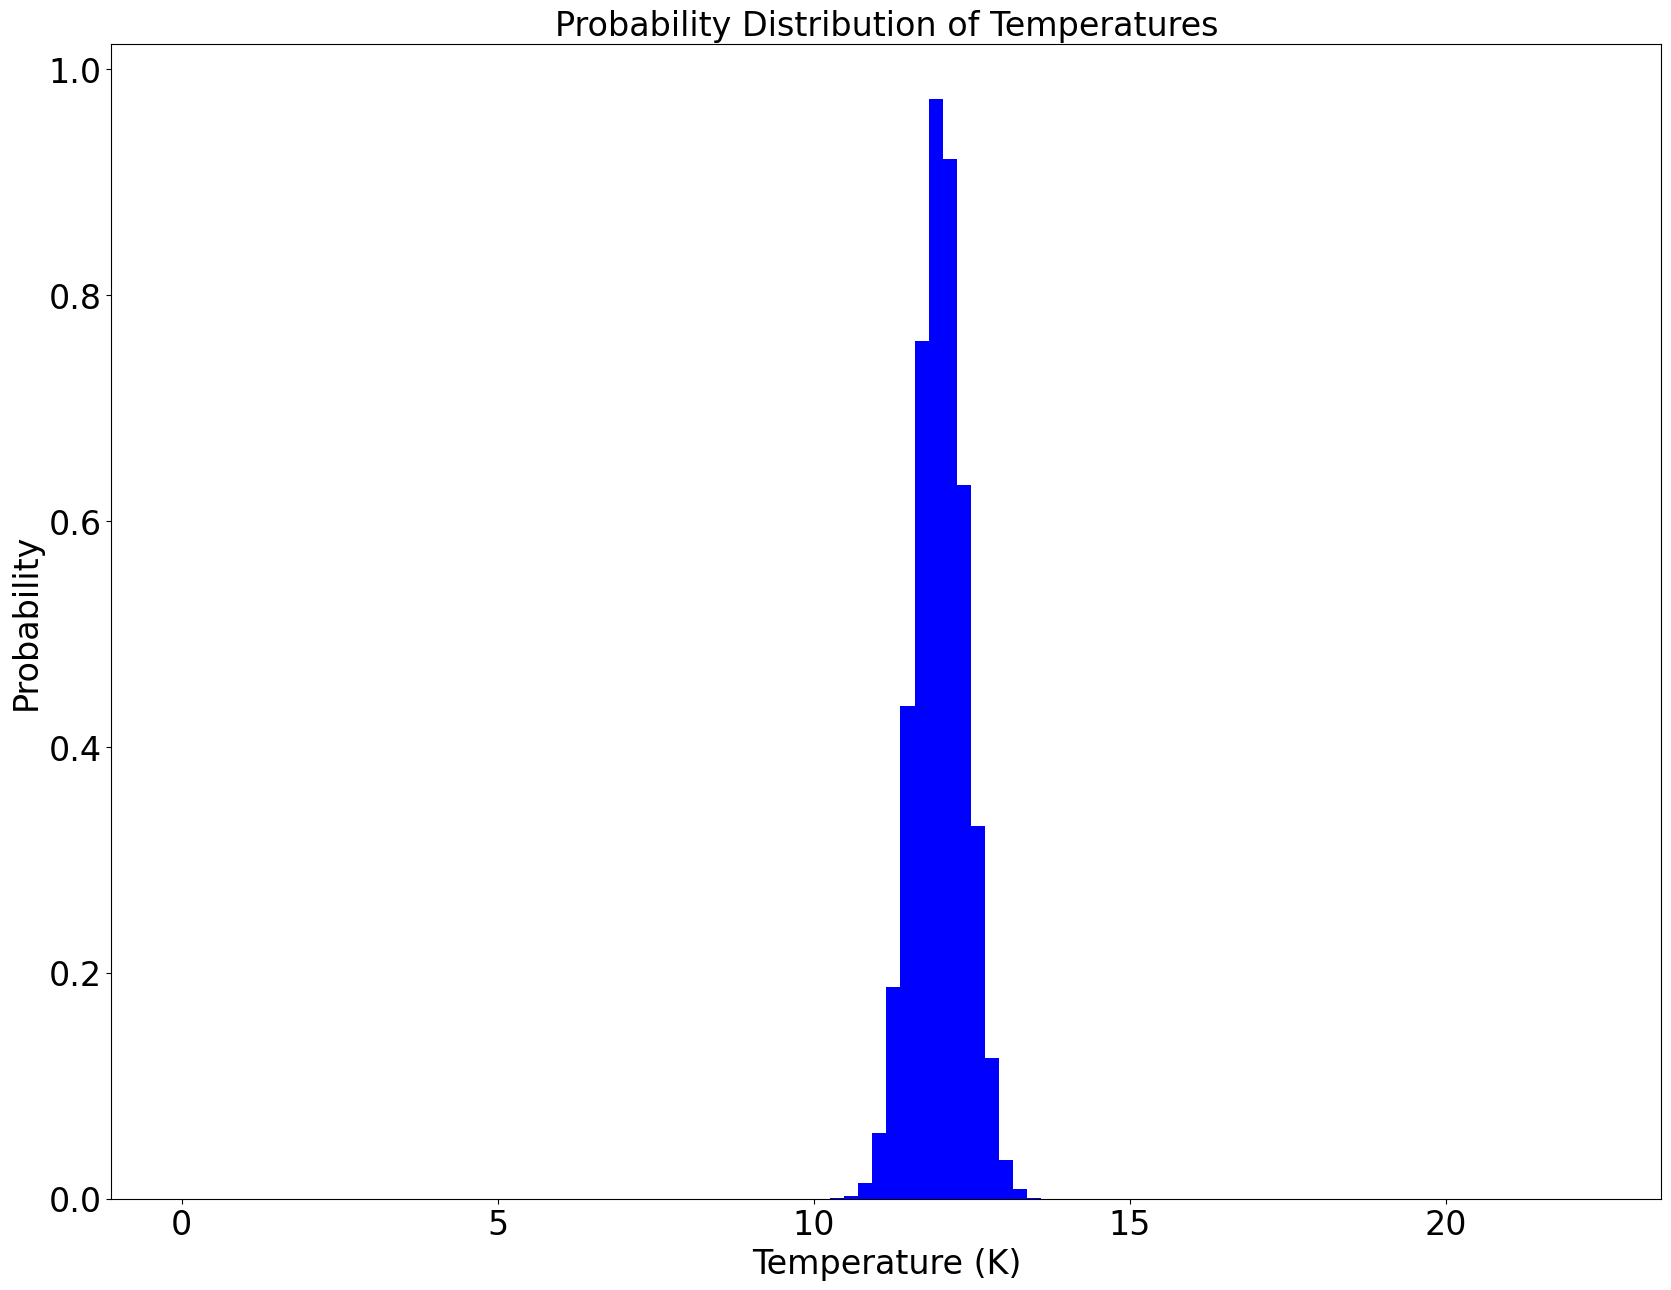

Text(0.5, 1.0, 'Probability Distribution of Temperatures in Semilog')

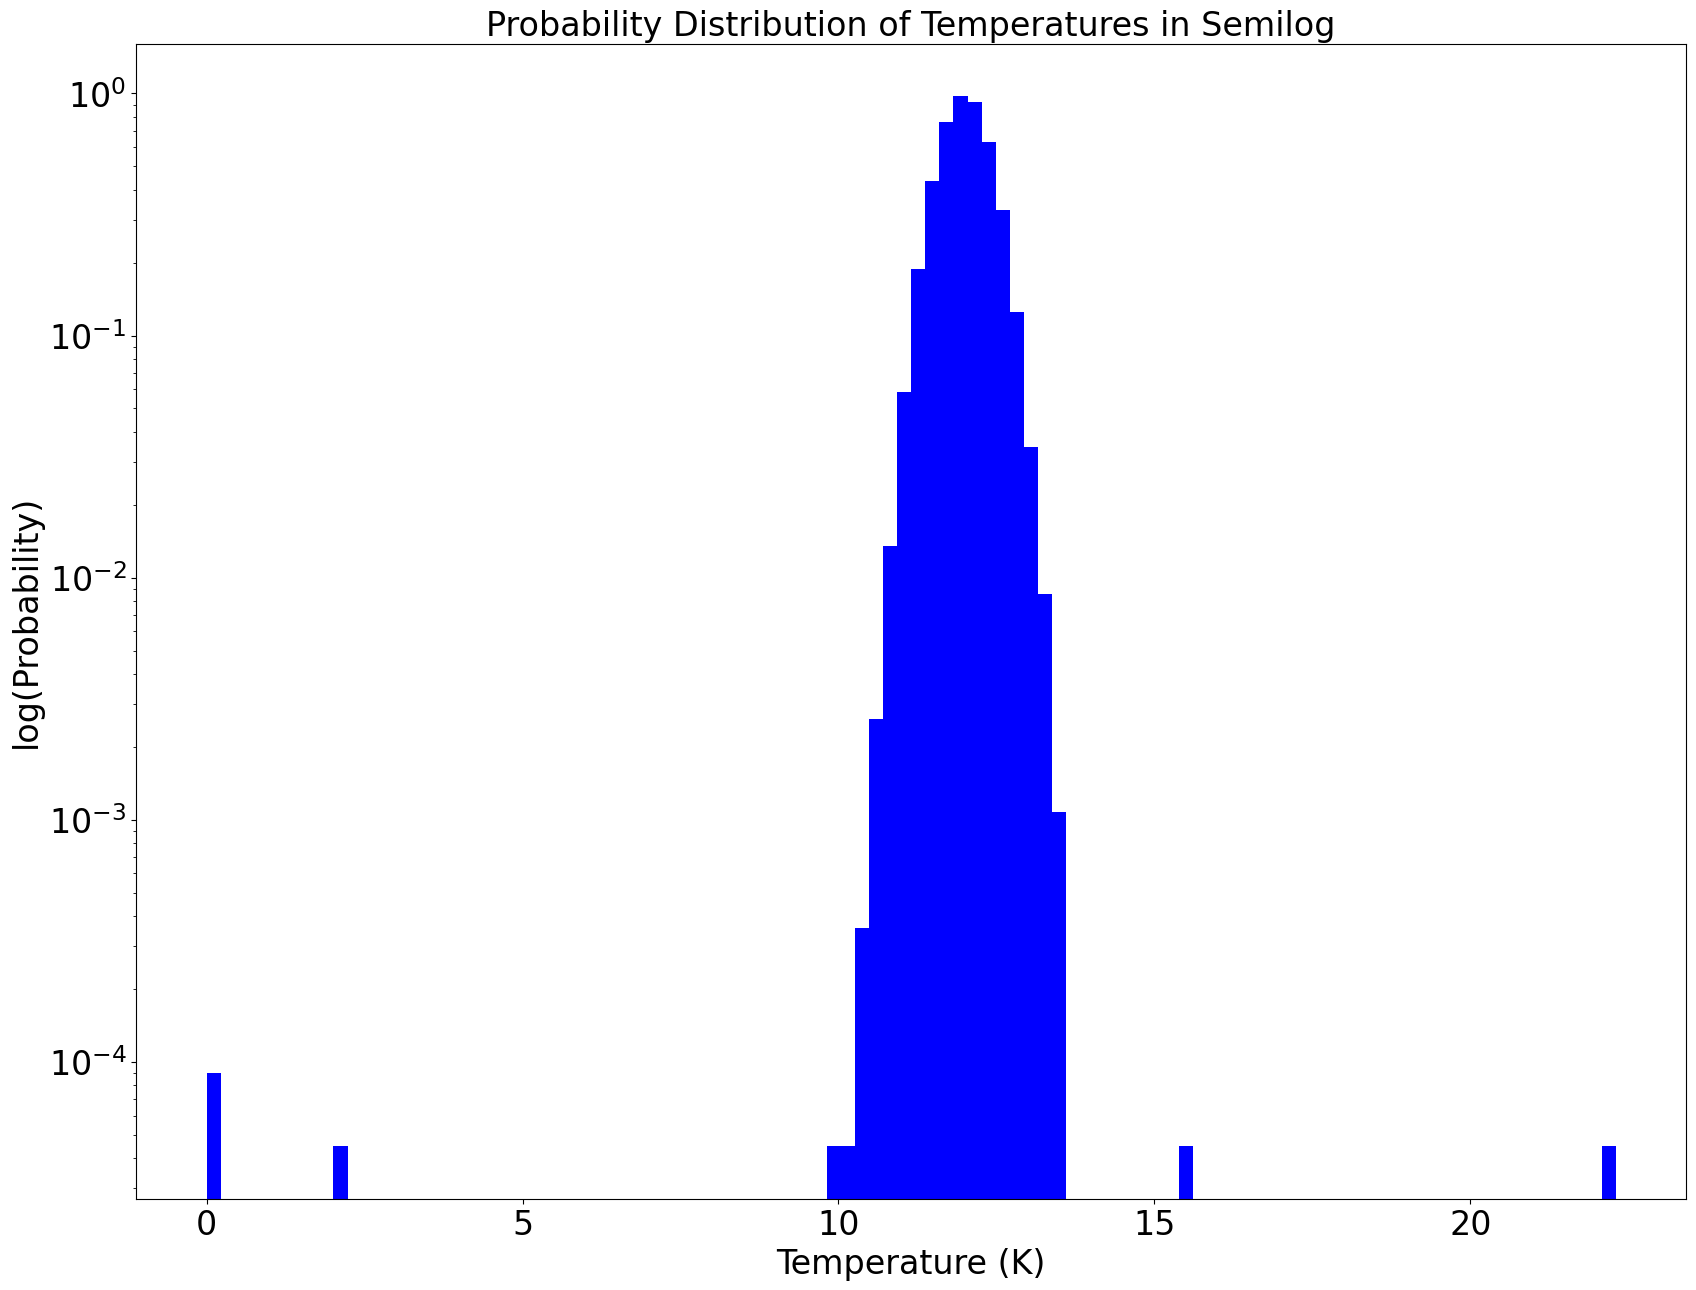

In [57]:
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True, color = 'blue')
plt.tick_params(labelsize = 24)
plt.xlabel('Temperature (K)', size = 24)
plt.ylabel('Probability', size = 24)
plt.title('Probability Distribution of Temperatures', size = 24)
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True, color = 'blue')
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.xlabel('Temperature (K)', size = 24)
plt.ylabel('log(Probability)', size = 24)
plt.title('Probability Distribution of Temperatures in Semilog', size = 24)


2) State the statistical question in words. Be very clear, and describe why you have chosen this statistical question.

What kind of threshold should we impose on our data such that that we throw away as much bad data point while keeping almost all, if not all, of our good data points? 

I chose this question because the threshold I am refering to is the value for sigma. Since the distribution is Gausian, we can make cuts at certain sigma values such that; beyound our threshold, all data points are disregarded, and within our threshold, they are kept. We can then use our simulated data points to test how well our cut performed.

In [48]:
# this funtion will take in a sigma value (threshold) and create a truth table related to the cuts we made (imposed thresho)
def truthTable(sigma):
    mean = 12
    sd = 0.4
        
    good_data_removed = 0;
    bad_data_removed = 0;
    for value in simulated_good_points:
        if value < (mean - sigma*sd) or value > (mean + sigma*sd):
            good_data_removed += 1
        
    
    for value in simulated_bad_points:
        if value < (mean - sigma*sd) or value > (mean + sigma*sd):
            bad_data_removed += 1
            
    good_kept = len(simulated_good_points) - good_data_removed
    bad_kept = len(simulated_bad_points) - bad_data_removed
    
    toReturn = {"True T" : {"Your Test Good" : good_kept, "Your Test Bad": bad_kept}, 
                "Bad T": {"Your Test Good" : good_data_removed, "Your Test Bad":bad_data_removed }}
    
    print(pd.DataFrame(toReturn))
            
        
    
    

In [49]:
truthTable(4.2)

                True T  Bad T
Your Test Good   99999      1
Your Test Bad        1      7


## Part B

How does the number of omissions, where you threw out good data, depend on the statistical threshold you chose and is it a predictable quantity?

In the following, we will find that the closer to the center the statistical threshold (that is the smaller the sigma) we are, the more good data we throw out.

In [50]:
for i in np.linspace(0, 5, 11):
    print('Omission for threshold of ' + ' sigma = ' + str(i))
    print('-----------------------------')
    truthTable(i)
    print('-----------------------------')
    print('                             ')
    print('                             ')

Omission for threshold of  sigma = 0.0
-----------------------------
                True T   Bad T
Your Test Good       0  100000
Your Test Bad        0       8
-----------------------------
                             
                             
Omission for threshold of  sigma = 0.5
-----------------------------
                True T  Bad T
Your Test Good   38369  61631
Your Test Bad        0      8
-----------------------------
                             
                             
Omission for threshold of  sigma = 1.0
-----------------------------
                True T  Bad T
Your Test Good   68326  31674
Your Test Bad        0      8
-----------------------------
                             
                             
Omission for threshold of  sigma = 1.5
-----------------------------
                True T  Bad T
Your Test Good   86575  13425
Your Test Bad        0      8
-----------------------------
                             
                             
O

Repeat: The closer to the center the statistical threshold (that is the smaller the sigma) the more good data we throw out.

## Part C

Are there mistakes of commission (bad data getting in)? If yes, are they avoidable and how do they depend on your statistical threshold?

Yes, there are mistakes of commissions. From part and and part b, we can avoid these mistakes in commission, but if we wanted to avoid ANY bad data from getting in, we must omit data points that are good as well. For example, a threshold to set sigma to 1.5 avoids any bad data from getting in, but that threshold also removes 13425 good data points, about 13 percent of good data.

# Problem 2 

 If we look at the alignment of stars on subsequent images, they don't perfectly align due to atmospheric and instrumental effects (even ignoring proper motion). The resulting distribution is two dimensional. Assume it is a 2D Gaussian with 1 arcsecond RMS.

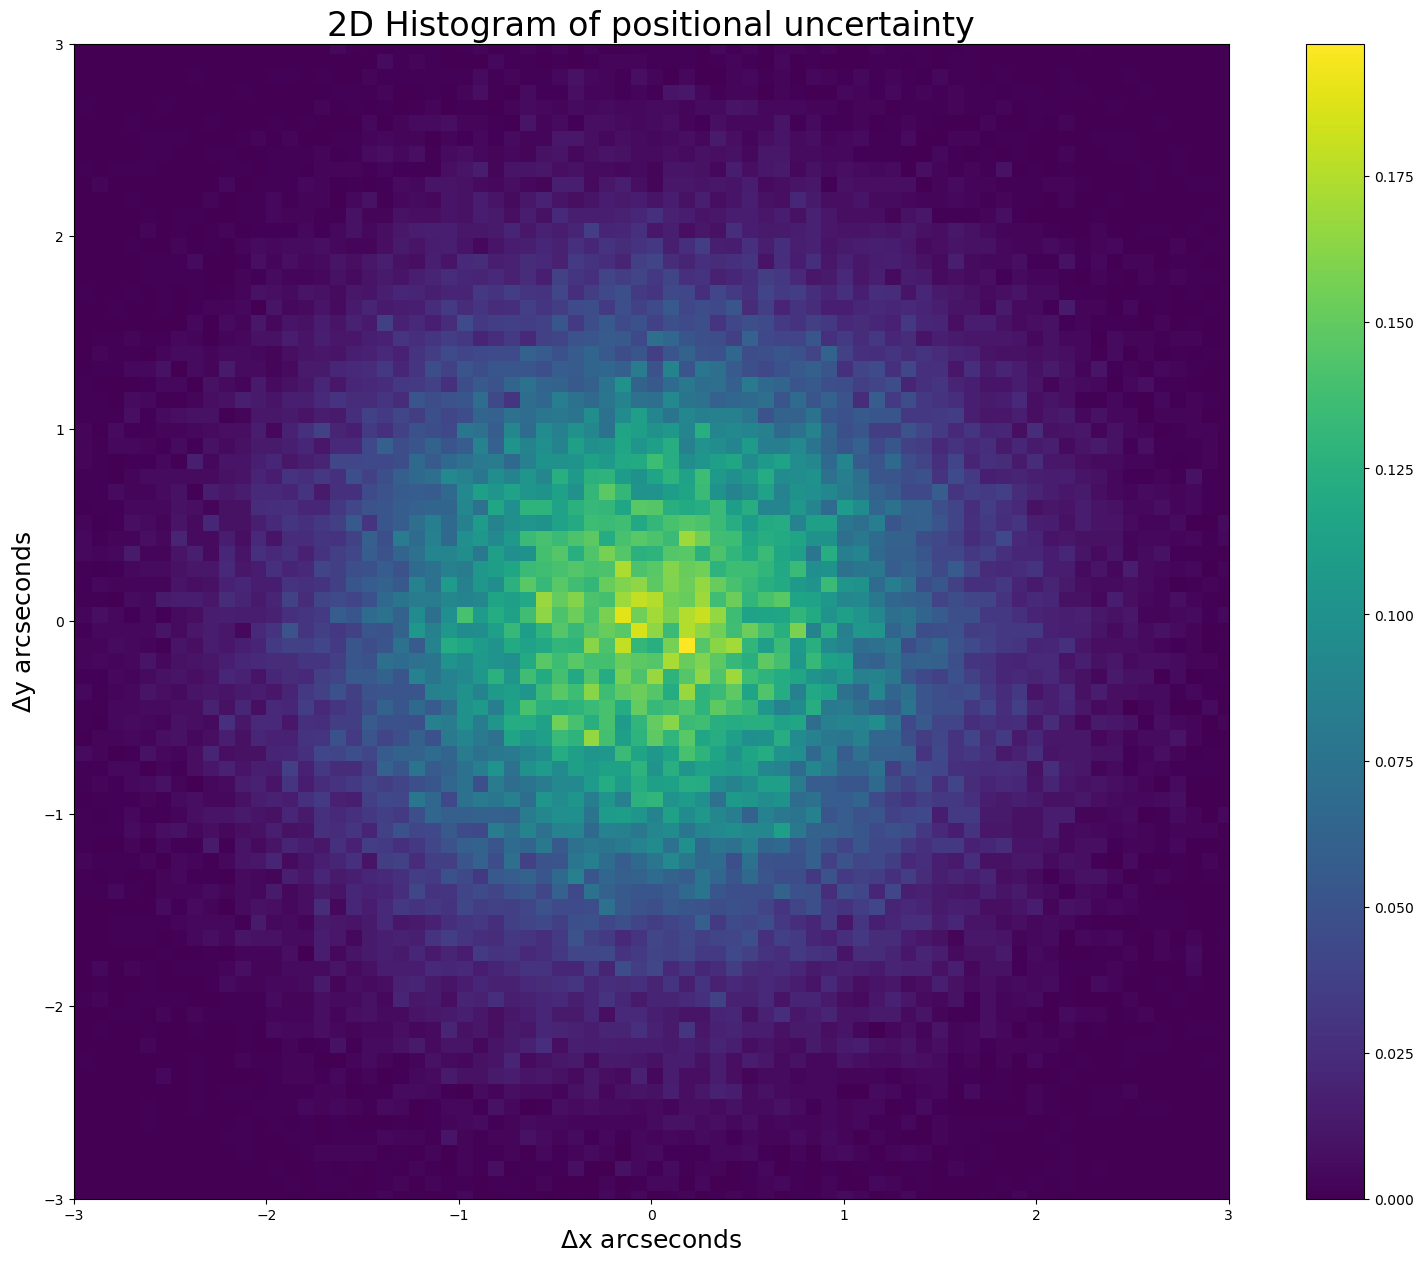

In [51]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)

If I have a potential asteroid, it will have some true movement between the images. We would like a '5 sigma' detection of movement. What is that distance in arcseconds?

### a) Statistical question 

What is the distance (arcseconds) that would provide us with a 2D Gaussian background of something asteroid-like or more asteriod-like with a sigma detection 5?


### b) What is the question in math?

In [64]:
distance = scipy.stats.rayleigh.isf(scipy.stats.norm.sf(5))
print(distance)

5.489079776062419


### c) What distance in arcseconds represents a 5 sigma detection of motion?

A distance of 5.49 arc-secounds represents a 5 sigma detection of motion?

# Problem 3